##### **Evaluation of the relationship between win rates and varying lookback windows of 5 different machine learning techniques to predict AAPL's stock price movement direction**

In [248]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression  
import yfinance as yf
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [218]:
df = yf.download("AAPl", start="2017-01-03", end="2022-01-03")
df.drop(["Open","High","Low","Close","Volume"], axis=1, inplace=True)
adjusted_close = df["Adj Close"].values
df2 = yf.download("AAPl", start="2022-01-03", end="2024-07-01")
df2.drop(["Open","High","Low","Close","Volume"], axis=1, inplace=True)
x_test=df2["Adj Close"].values

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [219]:
lookback_array=list(range(2, 101))

# Linear Regression Model

In [220]:
win_rates=[]
for lookback in lookback_array:
    training_array=[]
    for i in range(len(adjusted_close)-lookback):
        x=[]
        for _ in range(lookback):
            b=adjusted_close[i+_]
            x.append(b)
        training_array.append(x) 
    
    y_train=[]
    for i in range(len(adjusted_close)-lookback):
        a=adjusted_close[i+lookback]
        y_train.append(a)
        
    Lreg = LinearRegression()  
    Lreg.fit(training_array, y_train) 
    
    test_array=[]
    for i in range(len(x_test)-lookback):
        x=[]
        for _ in range(lookback):
            b=x_test[i+_]
            x.append(b)
        test_array.append(x)
    
    y_pred = Lreg.predict(test_array) 

    y_real=[]
    for i in range(len(x_test)-lookback):
        a=x_test[i+lookback]
        y_real.append(a)
        
    result_array=[]
    for i in range(len(x_test)-lookback):
        if (x_test[i+lookback]>x_test[i+lookback-1] and y_pred[i]>x_test[i+lookback-1]):
            result_array.append(1)
        elif (x_test[i+lookback]<x_test[i+lookback-1] and y_pred[i]<x_test[i+lookback-1]):
            result_array.append(1)
        else:
            result_array.append(0)
            
    num_ones = result_array.count(1)
    win_rate=num_ones/len(result_array)*100
    win_rates.append(win_rate)

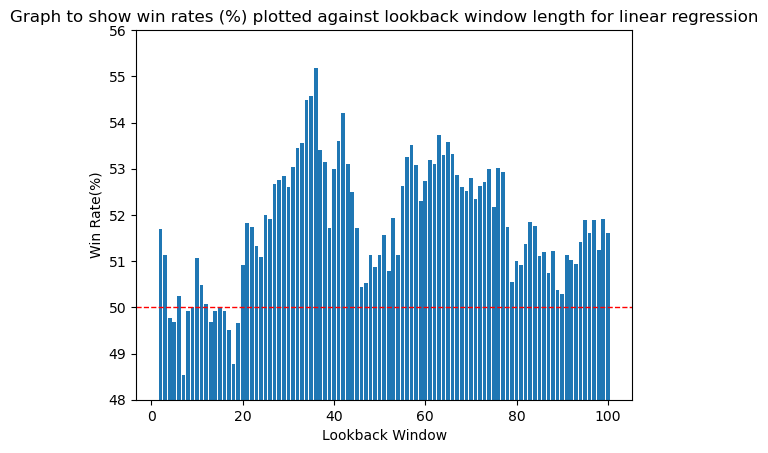

In [221]:
plt.bar(lookback_array,win_rates)
plt.ylim(48, 56)
plt.title("Graph to show win rates (%) plotted against lookback window length for linear regression")
plt.xlabel("Lookback Window")
plt.ylabel("Win Rate(%)")
plt.axhline(y=50, color='red', linestyle='--', linewidth=1, label='y=50')

##### - The graph shows that for the given time frame of training and testing, win rates over 50% are consistently yielded for lookback windows from 20 days to 100 days
##### - Highest win rates are yielded from lookback windows 34-36 days

# KSVM (Kernel Support Vector Machine) Model 

In [222]:
win_rates1=[]

for lookback in lookback_array:
    training_array1=[]
    for i in range(len(adjusted_close)-lookback):
        x=[]
        for _ in range(lookback):
            b=adjusted_close[i+_]
            x.append(b)
        training_array1.append(x) 
    y_train_binary = []
    for i in range(len(adjusted_close)-lookback):
        if (adjusted_close[i+lookback] > adjusted_close[i+lookback-1]):
            y_train_binary.append(1)   # 1 if price increases
        else:
            y_train_binary.append(0)   # 0  if otherwise
    scaler = StandardScaler()
    training_array1 = scaler.fit_transform(training_array1)
    
            
    ksvm = svm.SVC(kernel='rbf', gamma=0.1, C=10.0)
    ksvm.fit(training_array1, y_train_binary)
    
    testing_array1=[]
    for i in range(len(x_test)-lookback):
        x=[]
        for _ in range(lookback):
            b=x_test[i+_]
            x.append(b)
        testing_array1.append(x) 
    y_test_binary = []
    for i in range(len(x_test)-lookback):
        if (x_test[i+lookback] > x_test[i+lookback-1]):
            y_test_binary.append(1)   # 1 if price increases
        else:
            y_test_binary.append(0)   # 0  if otherwise
    testing_array1 = scaler.transform(testing_array1)
    
    accuracy = ksvm.score(testing_array1, y_test_binary)
    win_rates1.append(accuracy)

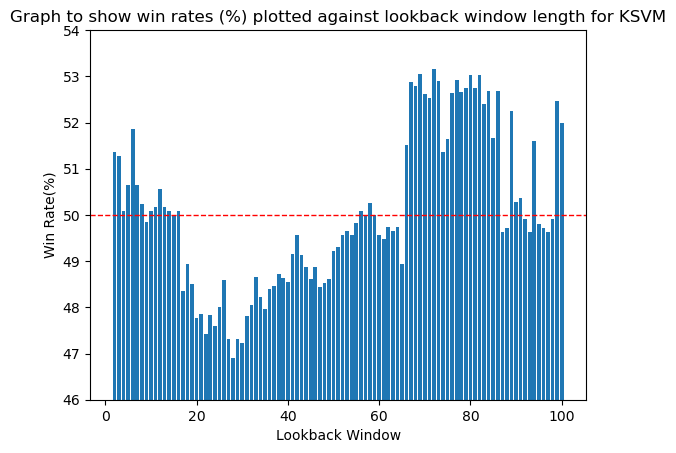

In [223]:
my_array = np.array(win_rates1)
win_rates2=my_array*100
plt.bar(lookback_array,win_rates2)
plt.ylim(46, 54)
plt.title("Graph to show win rates (%) plotted against lookback window length for KSVM")
plt.xlabel("Lookback Window")
plt.ylabel("Win Rate(%)")
plt.axhline(y=50, color='red', linestyle='--', linewidth=1, label='y=50')
plt.show()

##### - The graph shows that for the given time frame of training and testing, highest win rates are yielded for lookback windows from 65 days to 85 days
##### - Lookback windows below 65 days tend to yield much worse win rates

# SVM model (Support Vector Machine) Model

In [224]:
win_rates3=[]

for lookback in lookback_array:
    training_array1=[]
    for i in range(len(adjusted_close)-lookback):
        x=[]
        for _ in range(lookback):
            b=adjusted_close[i+_]
            x.append(b)
        training_array1.append(x) 
    y_train_binary = []
    for i in range(len(adjusted_close)-lookback):
        if (adjusted_close[i+lookback] > adjusted_close[i+lookback-1]):
            y_train_binary.append(1)   # 1 if price increases
        else:
            y_train_binary.append(0)   # 0  if otherwise
    scaler = StandardScaler()
    training_array1 = scaler.fit_transform(training_array1)
    
    model = svm.SVC(kernel='linear')
    model.fit(training_array1, y_train_binary)
    
    testing_array1=[]
    for i in range(len(x_test)-lookback):
        x=[]
        for _ in range(lookback):
            b=x_test[i+_]
            x.append(b)
        testing_array1.append(x) 
    y_test_binary = []
    for i in range(len(x_test)-lookback):
        if (x_test[i+lookback] > x_test[i+lookback-1]):
            y_test_binary.append(1)   # 1 if price increases
        else:
            y_test_binary.append(0)   # 0  if otherwise
    testing_array1 = scaler.transform(testing_array1)
    
    accuracy2 = model.score(testing_array1, y_test_binary)
    win_rates3.append(accuracy2)

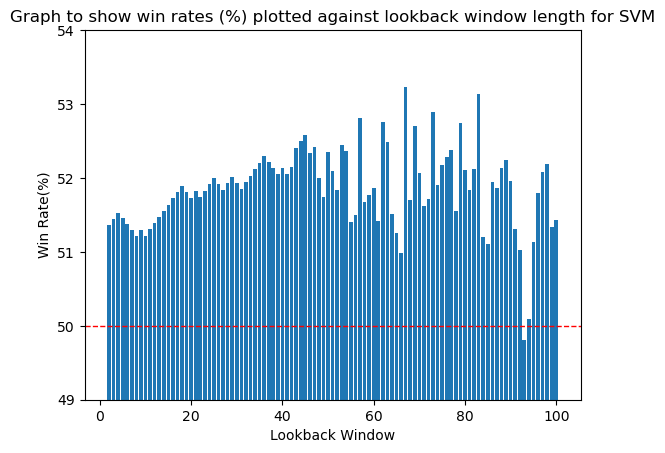

In [231]:
my_array2 = np.array(win_rates3)
win_rates4=my_array2*100
plt.bar(lookback_array,win_rates4)
plt.ylim(49, 54)
plt.title("Graph to show win rates (%) plotted against lookback window length for SVM")
plt.xlabel("Lookback Window")
plt.ylabel("Win Rate(%)")
plt.axhline(y=50, color='red', linestyle='--', linewidth=1, label='y=50')
plt.show()

##### - Win rates are consistently above 50% for all lookback windows from 2 to 100 days (in fact consistently over 51%)
##### - Highest win rates yielded for this SVM model are similiar to highest win rates yielded for the KSVM model
##### - Only one lookback window number of days that yields under 50% win rate therefor very reliable

# Random Forest Regression model

In [233]:
win_rates7=[]
for lookback in lookback_array:
    training_array=[]
    for i in range(len(adjusted_close)-lookback):
        x=[]
        for _ in range(lookback):
            b=adjusted_close[i+_]
            x.append(b)
        training_array.append(x) 
    
    y_train=[]
    for i in range(len(adjusted_close)-lookback):
        a=adjusted_close[i+lookback]
        y_train.append(a)
        
    model2 = RandomForestRegressor(n_estimators=100) 
    model2.fit(training_array, y_train) 
    
    test_array=[]
    for i in range(len(x_test)-lookback):
        x=[]
        for _ in range(lookback):
            b=x_test[i+_]
            x.append(b)
        test_array.append(x)
    
    y_pred2 = model2.predict(test_array) 

    y_real2=[]
    for i in range(len(x_test)-lookback):
        a=x_test[i+lookback]
        y_real.append(a)
        
    result_array=[]
    for i in range(len(x_test)-lookback):
        if (x_test[i+lookback]>x_test[i+lookback-1] and y_pred2[i]>x_test[i+lookback-1]):
            result_array.append(1)
        elif (x_test[i+lookback]<x_test[i+lookback-1] and y_pred2[i]<x_test[i+lookback-1]):
            result_array.append(1)
        else:
            result_array.append(0)
            
    num_ones = result_array.count(1)
    win_rate1=num_ones/len(result_array)*100
    win_rates7.append(win_rate1)

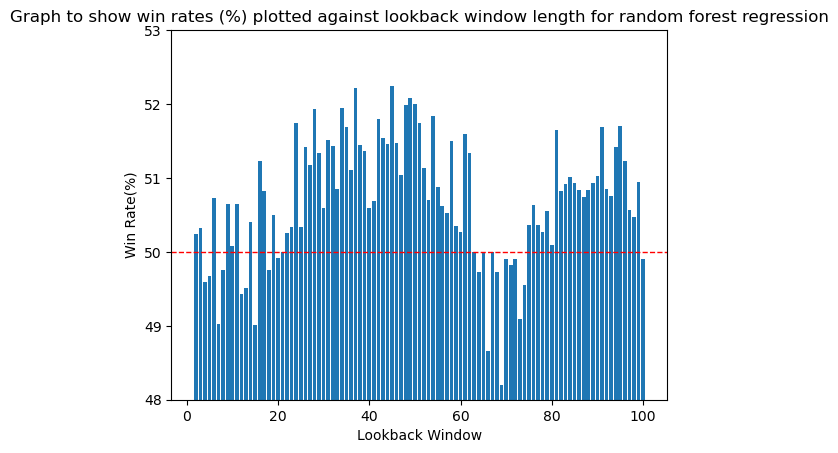

In [235]:
plt.bar(lookback_array,win_rates7)
plt.ylim(48, 53)
plt.title("Graph to show win rates (%) plotted against lookback window length for random forest regression")
plt.xlabel("Lookback Window")
plt.ylabel("Win Rate(%)")
plt.axhline(y=50, color='red', linestyle='--', linewidth=1, label='y=50')

##### - Highest win rates yielded over lookback windows 30 to 60 days
##### - Not very consistently above 50%

# Gradient Boosting Regression Model

In [242]:
win_rates9=[]
for lookback in lookback_array:
    training_array=[]
    for i in range(len(adjusted_close)-lookback):
        x=[]
        for _ in range(lookback):
            b=adjusted_close[i+_]
            x.append(b)
        training_array.append(x) 
    
    y_train=[]
    for i in range(len(adjusted_close)-lookback):
        a=adjusted_close[i+lookback]
        y_train.append(a)
        
    model3 = GradientBoostingRegressor(n_estimators=100) 
    model3.fit(training_array, y_train) 
    
    test_array=[]
    for i in range(len(x_test)-lookback):
        x=[]
        for _ in range(lookback):
            b=x_test[i+_]
            x.append(b)
        test_array.append(x)
    
    y_pred3 = model3.predict(test_array) 

    y_real3=[]
    for i in range(len(x_test)-lookback):
        a=x_test[i+lookback]
        y_real.append(a)
        
    result_array=[]
    for i in range(len(x_test)-lookback):
        if (x_test[i+lookback]>x_test[i+lookback-1] and y_pred3[i]>x_test[i+lookback-1]):
            result_array.append(1)
        elif (x_test[i+lookback]<x_test[i+lookback-1] and y_pred3[i]<x_test[i+lookback-1]):
            result_array.append(1)
        else:
            result_array.append(0)
            
    num_ones = result_array.count(1)
    win_rate2=num_ones/len(result_array)*100
    win_rates9.append(win_rate2)

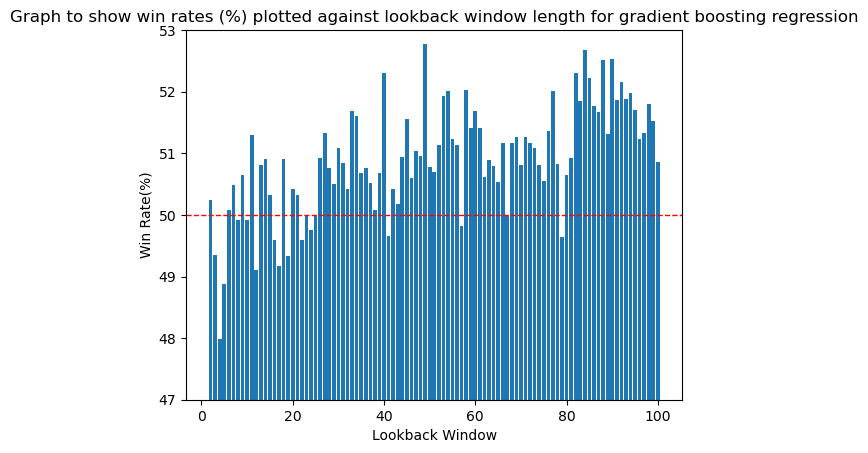

In [247]:
plt.bar(lookback_array,win_rates9)
plt.ylim(47, 53)
plt.title("Graph to show win rates (%) plotted against lookback window length for gradient boosting regression")
plt.xlabel("Lookback Window")
plt.ylabel("Win Rate(%)")
plt.axhline(y=50, color='red', linestyle='--', linewidth=1, label='y=50')

##### - Fairly consistent over 50% win rates for most lookback windows
##### - Highest win rates yielded for lookback windows 80 to 100 days